### 데이터 구조 변경
- 와이드 포맷과 롱 포맷
  - melt() : 와이드 포맷을 롱 포맷 데이터로 바꿈 (언피벗팅)
  - pivot() : 롱 포맷을 와이드 포맷 데이터로 바꿈
와이드 포맷(wide format)| 롱 포맷(long format)| 비고
-|-|--
가로로 긴 형식의 데이터구조|세로로 긴 형식의 데이터구조
열단위 데이터 구조|행단위 데이터 구조
피벗 테이블(pivottable)|언피벗 테이블(unpivottable)|몰튼(molten) 테이블
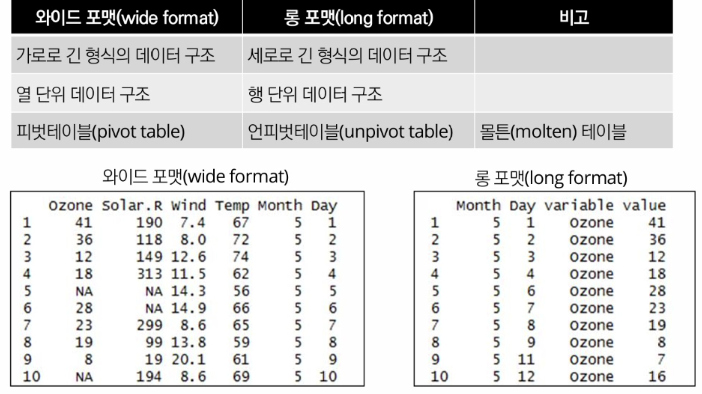

In [6]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [3]:
# 1973년 5월에서 9월까지 뉴욕의 대기질을 측정한 데이터셋
airquality_data = sm.datasets.get_rdataset('airquality')

In [4]:
airquality = airquality_data.data

In [5]:
airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


#### melt()를 이용한 언피벗팅
melt() 함수는 와이드 포맷 데이터를 롱포맷 데이터로 데이터 구조를 바꿈

In [10]:
# id_vars : 기준으로 고정 할 열 지정
# value_vars : 언피벗팅 후 variable과 value열에 옮겨질 열 지정
pd.melt(airquality, id_vars=['Month', 'Day'],
        value_vars=['Ozone'])

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
148,9,26,Ozone,30.0
149,9,27,Ozone,NaN
150,9,28,Ozone,14.0
151,9,29,Ozone,18.0


In [11]:
pd.melt(airquality, id_vars=['Month', 'Day'],
        value_vars=['Ozone', 'Solar.R', 'Wind', 'Temp'])

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [13]:
# 나머지 모든 열을 언피벗팅 할 때에는 value_vars는 생략이 가능하다
pd.melt(airquality, id_vars=['Month', 'Day'])

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [15]:
# 데이터 프레임 이름으로 melt함수를 직접 적용 할 수 있다
airquality_melted = airquality.melt(id_vars=['Month', 'Day'])

In [16]:
airquality_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [18]:
# 피벗팅 (롱 포맷을 와이드 포맷으로 변경)
# pivot_table()
airquality2 = airquality_melted.pivot_table(index = ['Month', 'Day'],
                              columns = ['variable'],
                              values = ['value'])

In [19]:
airquality2.head()

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3

In [ ]:
airquality2 = airquality2.reset_index(level=['Month', 'Day'], col_level=1)

In [25]:
# Month와 Day를 index의 열로 이동 됨 (col_level=1)
airquality2.head()

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3

In [26]:
airquality2.columns = airquality2.columns.droplevel(level=0)

In [27]:
airquality2.head()

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


In [28]:
# pd.melt를 활용한 데이터 변환
df = pd.DataFrame({"key": ["foo", "bar", "baz"],
                   "A": [1, 2, 3],
                   "B": [4, 5, 6],
                   "C": [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [30]:
# key를 기준으로 언피벗팅
melted = pd.melt(df, id_vars='key')
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [32]:
# pivot : 데이터 중복이 없거나 집계를 하지 않을 경우 사용
reshaped = melted.pivot(index='key', columns='variable', values='value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


#### apply()

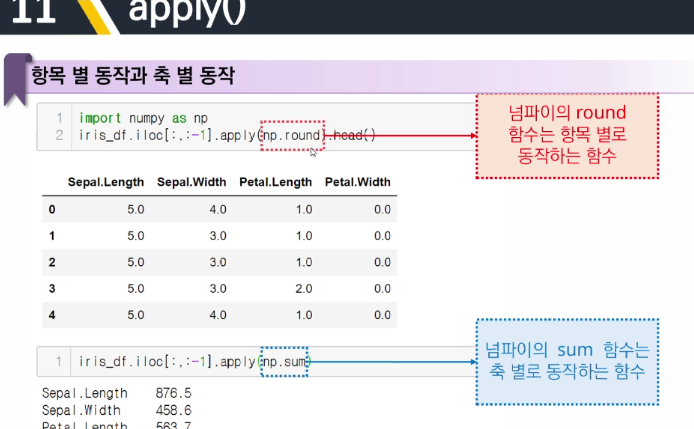

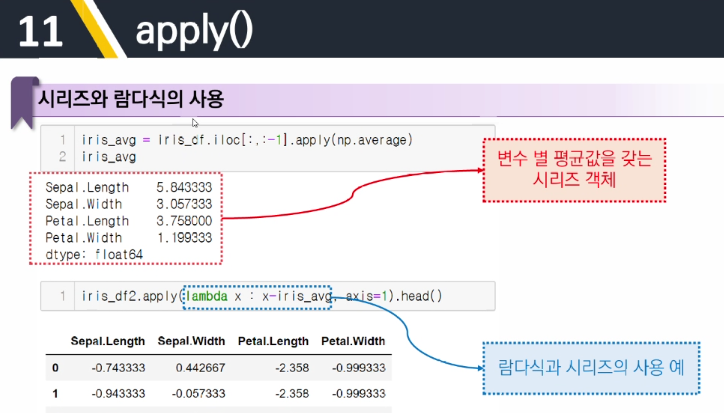
- apply뒤에는 함수가 와야하는데 lambda는 일회성 함수로 사용 할 수 있다

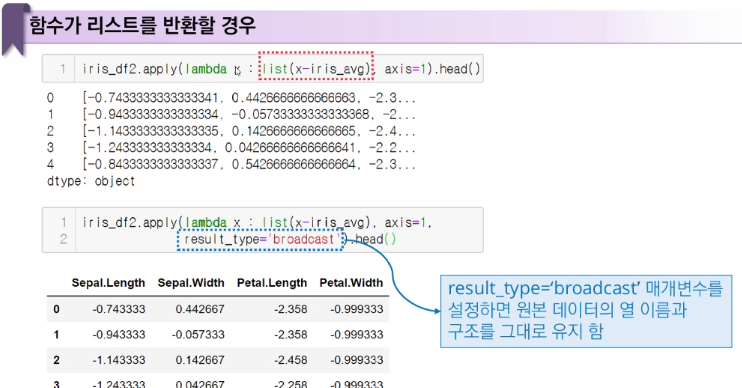
- 원본 데이터를 유지하고 x-iris_avg, axis=1을 적용한다

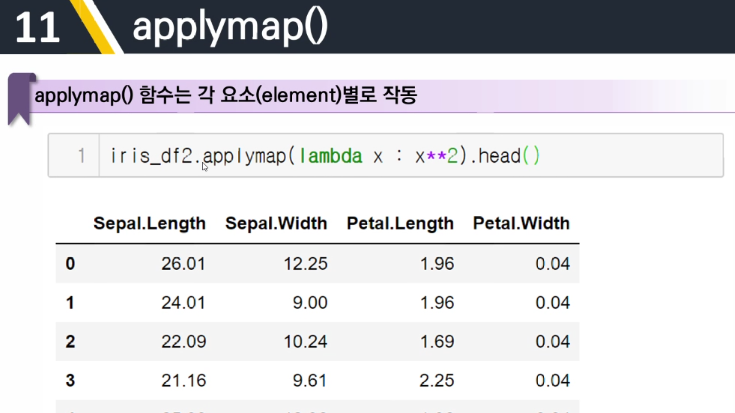

#### map()

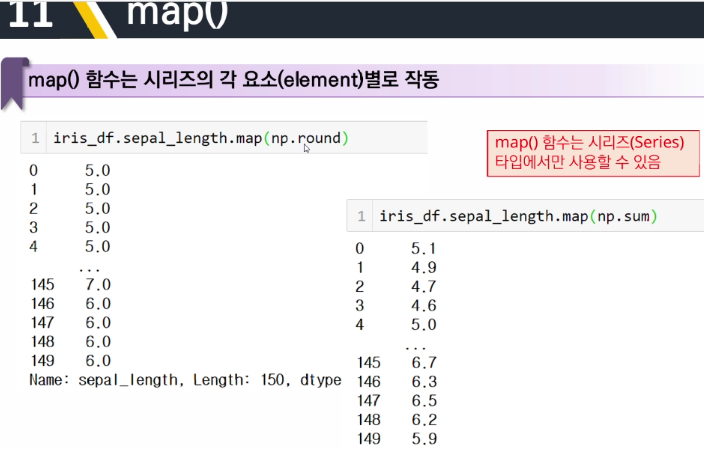

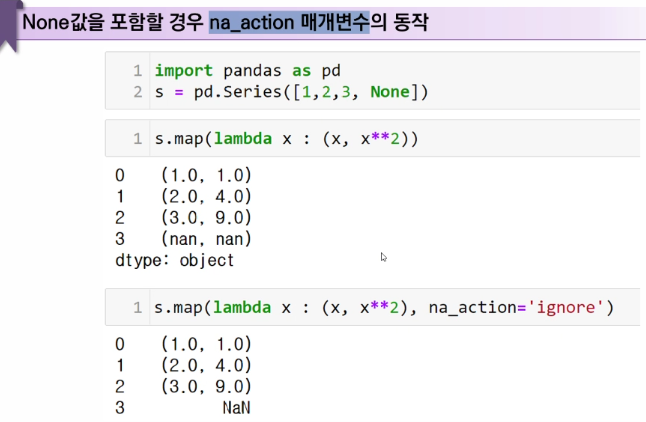
- ignore를 적용함으로 na값을 무시한다